# APSG tutorial - Part 3

In [1]:
from apsg import *

## StereoNet class
`StereoNet` allows to visualize fetaures on stereographic projection. Both equal-area Schmidt (default) and equal-angle Wulff projections are supported.

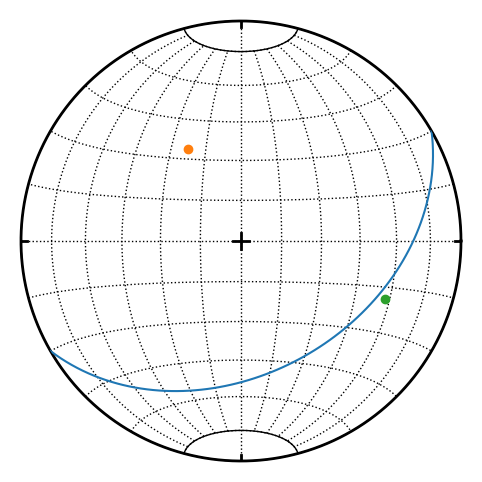

In [2]:
s = StereoNet()
s.great_circle(fol(150, 40))
s.pole(fol(150, 40))
s.line(lin(112, 30))
s.show()

A small circles (or cones) could be plotted as well

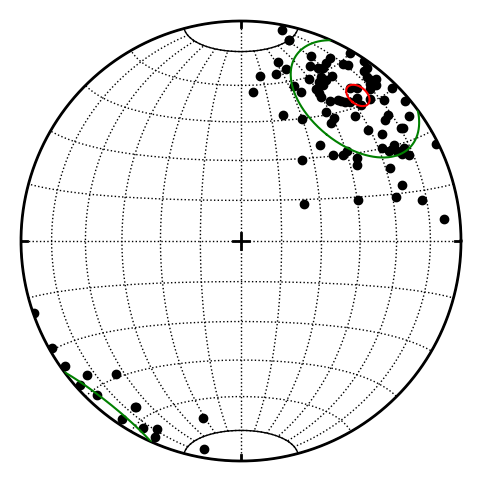

In [3]:
s = StereoNet()
l = linset.random_fisher(position=lin(40, 15), kappa=15)
s.line(l, color='k')
s.cone(l.fisher_cone_a95(), color='r')  # confidence cone on resultant
s.cone(l.fisher_cone_csd(), color='g')  # confidence cone on 63% of data
s.show()

For density contouring a ``contour`` method is available

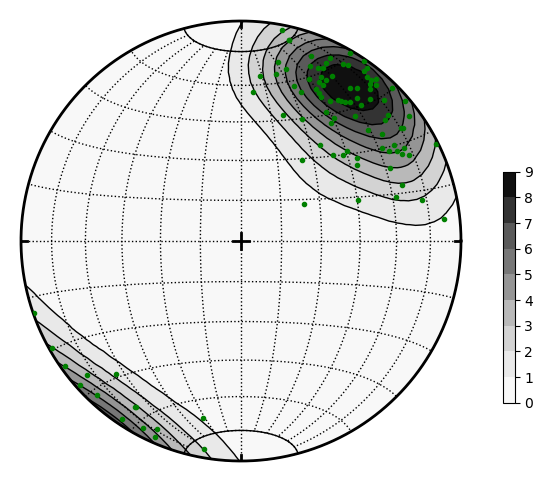

In [4]:
s = StereoNet()
s.contour(l, levels=8, colorbar=True)
s.line(l, color='g', marker='.')
s.show()

**APSG** also provides ``pairset`` and ``faultset`` classes to store ``pair`` or ``fault`` datasets. It can be inicialized by passing list of ``pair`` or ``fault`` objects as argument or use class methods ``from_array`` or ``from_csv``

In [5]:
p = pairset([pair(120, 30, 165, 20),
             pair(215, 60, 280,35),
             pair(324, 70, 35, 40)])
p.misfit

array([0.00000000e+00, 1.42108547e-14, 0.00000000e+00])

``StereoNet`` has two special methods to visualize fault data. Method ``fault`` produce classical Angelier plot

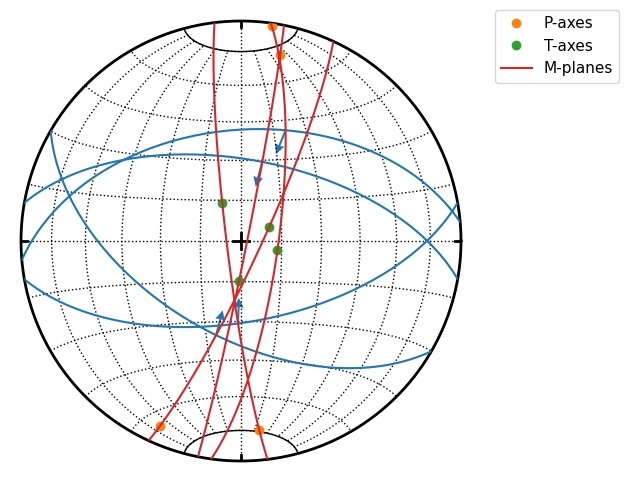

In [6]:
f = faultset([fault(170, 60, 182, 59, -1),
              fault(210, 55, 195, 53, -1),
              fault(10, 60, 15, 59, -1),
              fault(355, 48, 22, 45, -1)])
s = StereoNet()
s.fault(f)
s.line(f.p, label='P-axes')
s.line(f.t, label='T-axes')
s.great_circle(f.m, label='M-planes')
s.show()

``hoeppner`` method produce Hoeppner diagram and must be invoked from ``StereoNet`` instance

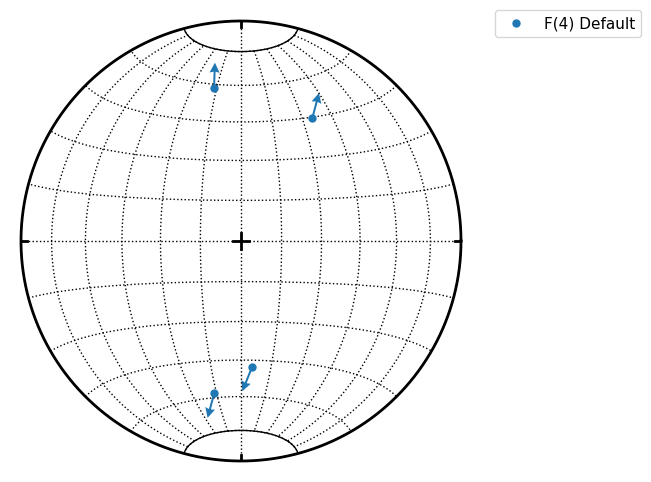

In [7]:
s = StereoNet()
s.hoeppner(f, label=repr(f))
s.show()

## StereoGrid class
``StereoGrid`` class allows to visualize any scalar field on StereoNet. It is used for plotting contour diagrams, but it exposes ``apply_func`` method to calculate scalar field by any user-defined function. Function must accept three element ``numpy.array`` as first argument passed from grid points of ``StereoGrid``.

Following example defines function to calculate resolved shear stress on plane from given stress tensor. ``StereoGrid`` is used to calculate this value over all directions and finally values are plotted by ``StereoNet``

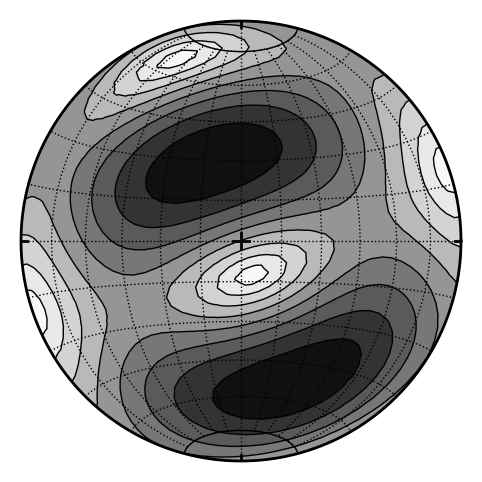

In [8]:
S = stress([[-10, 2, -3],[2, -5, 1], [-3, 1, 2]])
s = StereoNet()
s.grid.apply_func(S.shear_stress)
s.contour(levels=10)
s.show()

The ``StereoGrid`` provide also ``amgmech`` (Angelier dihedra) method for paleostress analysis. Results are stored in ``StereoGrid``. Default behavior is to calculate counts (positive in extension, negative in compression)

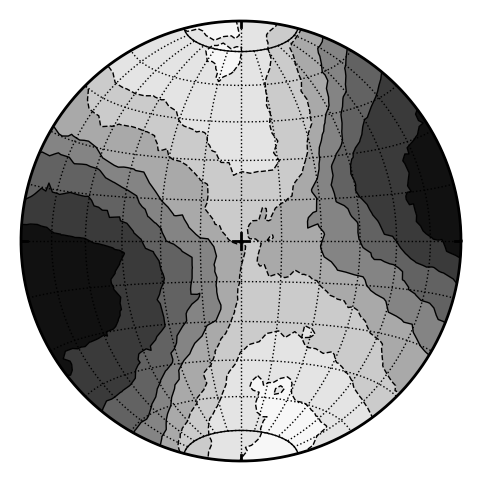

In [9]:
f = faultset.from_csv('mele.csv')
s = StereoNet()
s.grid.angmech(f)
s.contour()
s.show()

Setting `method` to `probability`, maximum likelihood estimate is calculated.

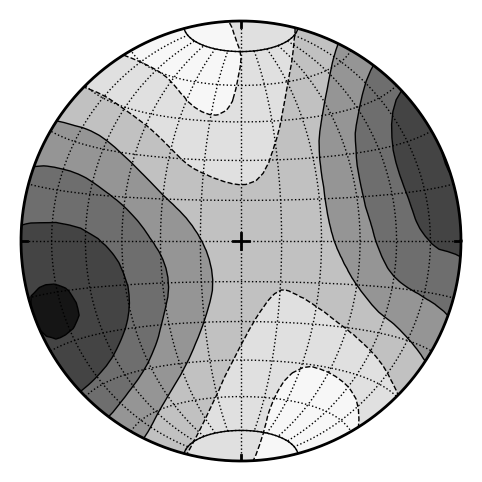

In [10]:
f = faultset.from_csv('mele.csv')
s = StereoNet()
s.grid.angmech(f, method='probability')
s.contour()
s.show()

In [11]:
s.grid

StereoGrid EqualAreaProj 3000 points.
Maximum: 48.3587 at L:250/11
Minimum: -36.1316 at L:158/14